In [36]:
install.packages("fastICA")
install.packages("rgr")
install.packages("lme4")
install.packages("ggplot2")
install.packages("ggpubr")

library(ggplot2)
library(ggpubr)
library(lme4)
library(rgr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [2]:
data <- read.csv("NBA_stats.csv")

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,⋯,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,⋯,NA,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,⋯,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,⋯,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
5,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,⋯,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
6,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,⋯,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7


# **C**

In [3]:
data_mod<-data[-c(data[,3]=="PG"),]
data_mod

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,⋯,NA,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,⋯,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,⋯,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
5,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,⋯,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
6,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,⋯,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
7,5,LaMarcus Aldridge\aldrila01,C,35,BRK,5,5,26.0,5.0,9.6,⋯,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
8,6,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,3.1,0.2,0.8,⋯,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
9,7,Nickeil Alexander-Walker\alexani01,SG,22,NOP,46,13,21.9,4.2,10.0,⋯,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
10,8,Grayson Allen\allengr01,SG,25,MEM,50,38,25.2,3.5,8.3,⋯,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6


In [15]:
data_mod[data_mod %in% c("NULL", "")] <- NA

#### count of null values

In [16]:
sum(is.na(data_mod))

[1] 74

#### find that where are null values

In [20]:
for(i in 1:ncol(data_mod)) {       # for-loop over columns
  cat(names(data_mod)[i], sum(is.na(data_mod[, i])), '\n')
}

Rk 0 
Player 0 
Pos 0 
Age 0 
Tm 0 
G 0 
GS 0 
MP 0 
FG 0 
FGA 0 
FG. 2 
X3P 0 
X3PA 0 
X3P. 35 
X2P 0 
X2PA 0 
X2P. 6 
eFG. 2 
FT 0 
FTA 0 
FT. 29 
ORB 0 
DRB 0 
TRB 0 
AST 0 
STL 0 
BLK 0 
TOV 0 
PF 0 
PTS 0 


#### Check datatype of null values

In [21]:
sapply(data_mod, class)

Rk      Player         Pos         Age          Tm           G 
  "integer" "character" "character"   "integer" "character"   "integer" 
         GS          MP          FG         FGA         FG.         X3P 
  "integer"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       X3PA        X3P.         X2P        X2PA        X2P.        eFG. 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
         FT         FTA         FT.         ORB         DRB         TRB 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
        AST         STL         BLK         TOV          PF         PTS 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

In [22]:
data_mod[is.na(data_mod)] <- 0
sum(is.na(data_mod))

[1] 0

In [ ]:
attach(data_mod)
head(data_mod)

# D 

we use scatter plot to show the correlation between 2 variable but in this case we can't determine what kind of relation exists between these 2 variables.

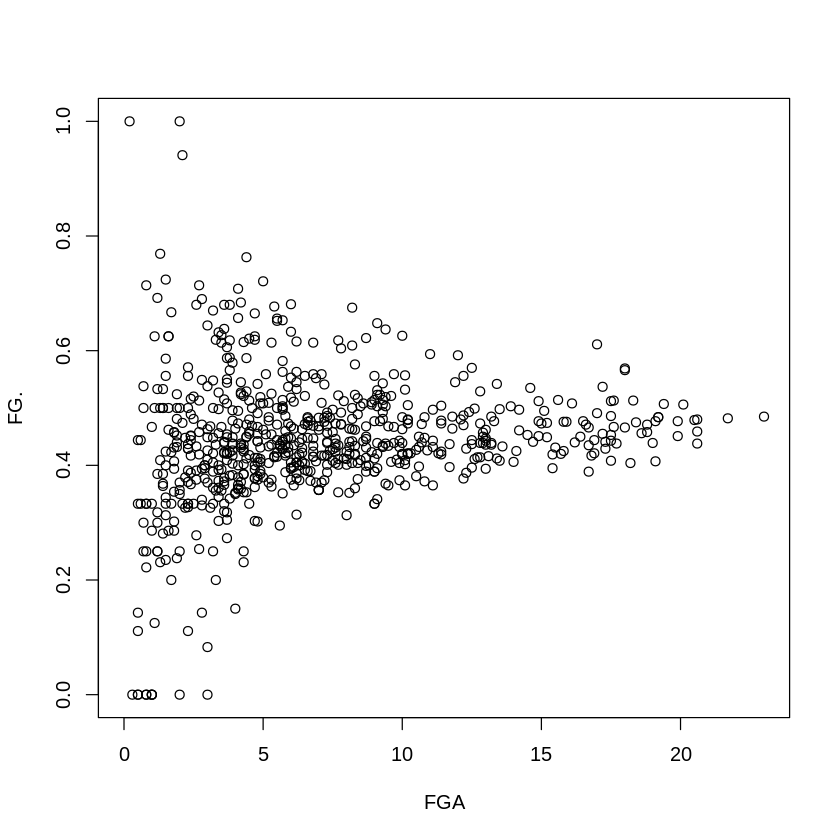

In [4]:
plot(FGA,FG.)

# E 

lm is used to fit linear models. It can be used to carry out regression, single stratum analysis of variance and analysis of covariance (although aov may provide a more convenient interface for these).





Call:
lm(formula = FG. ~ FGA, data = data_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42501 -0.04972 -0.00867  0.04344  0.58710 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.4120331  0.0075907  54.281  < 2e-16 ***
FGA         0.0043243  0.0009038   4.785 2.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1131 on 702 degrees of freedom
Multiple R-squared:  0.03158,	Adjusted R-squared:  0.0302 
F-statistic: 22.89 on 1 and 702 DF,  p-value: 2.089e-06


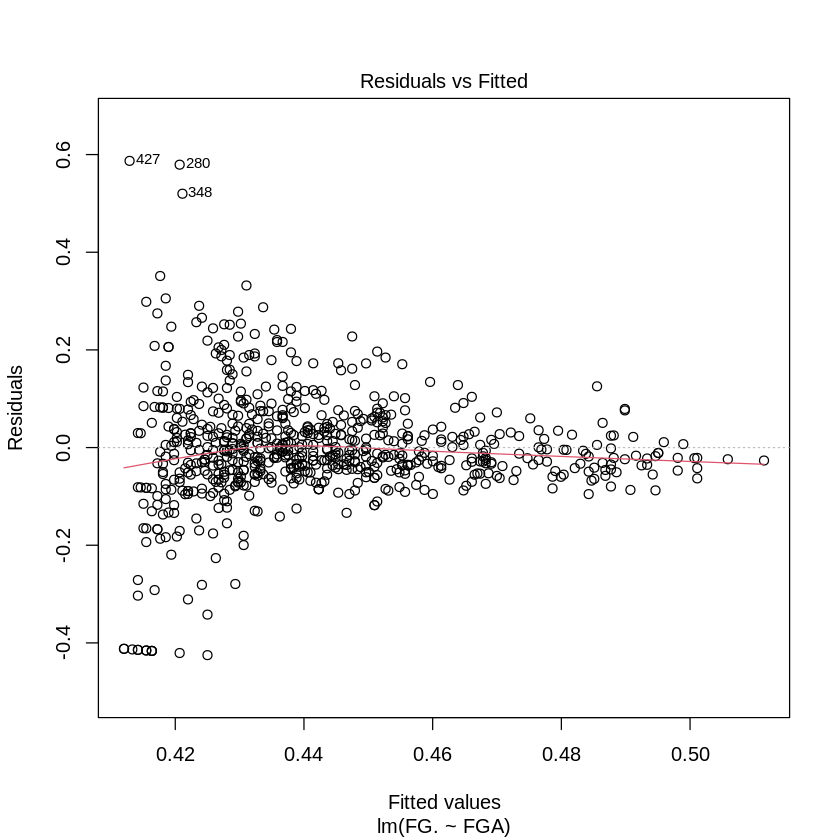

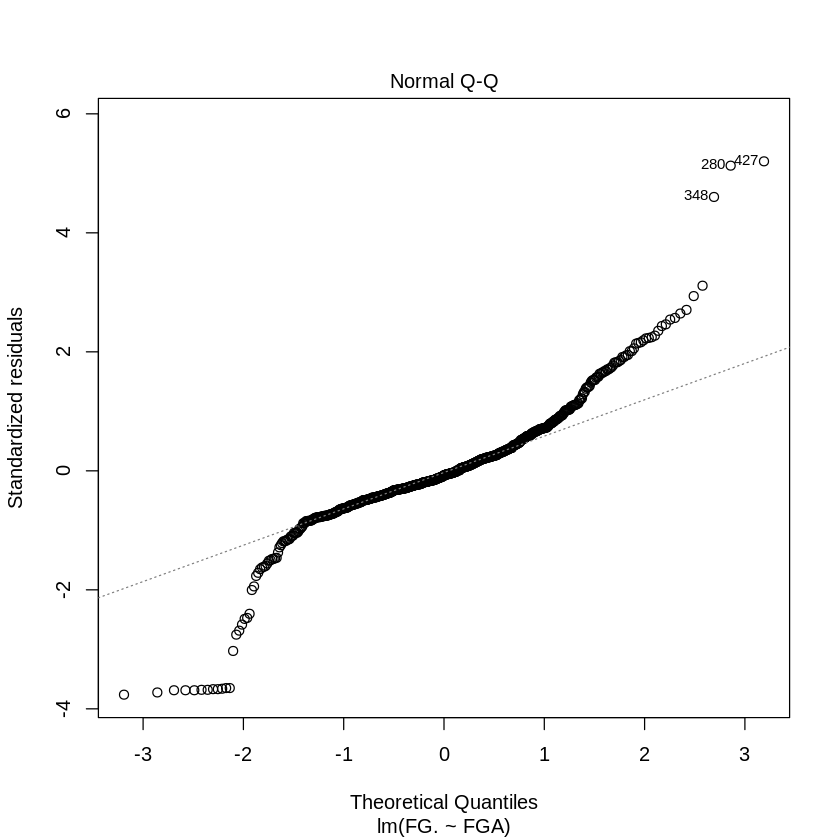

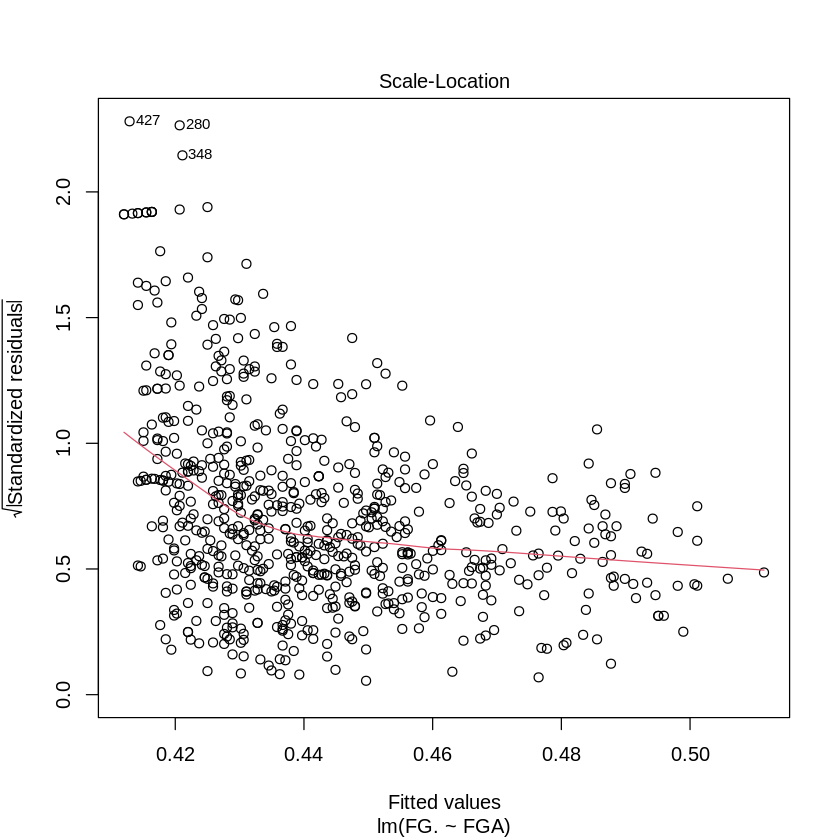

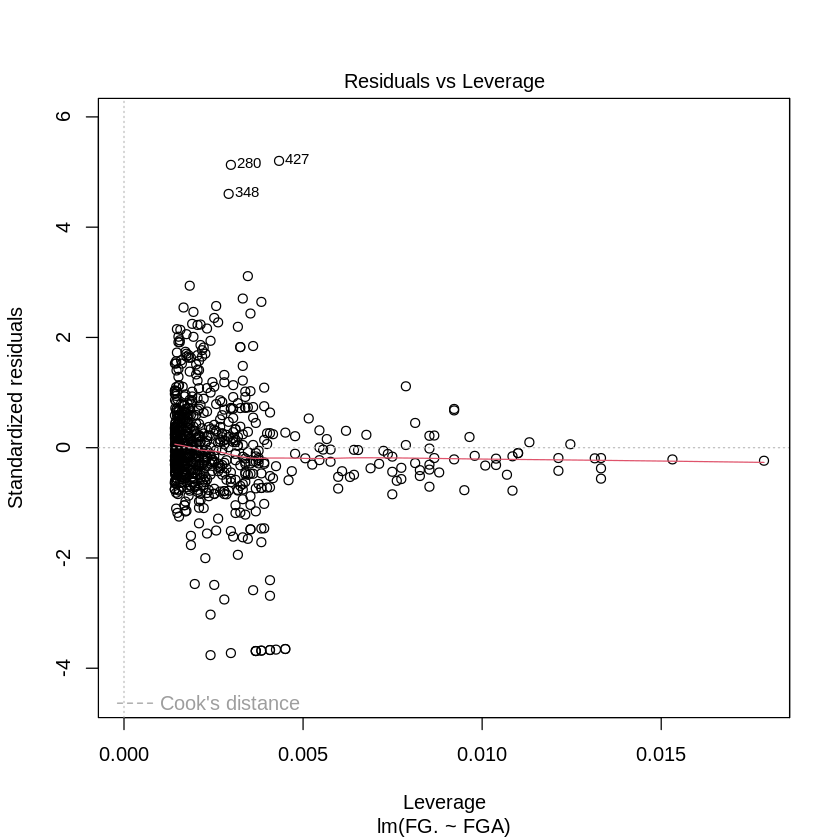

In [42]:
model<-lm(FG.~FGA,data=data_mod)
summary(model)

plot(model)

Residuals are essentially the difference between the actual observed response values (distance to stop dist in our case) and the response values that the model predicted.

Theoretically, in simple linear regression, the **coefficients** are two unknown constants that represent the intercept and slope terms in the linear model.

The **coefficient Estimate** contains two rows; the first one is the intercept

The **coefficient Standard Error** measures the average amount that the coefficient estimates vary from the actual average value of our response variable

The **coefficient t-value**is a measure of how many standard deviations our coefficient estimate is far away from 0. We want it to be far away from zero as this would indicate we could reject the null hypothesis - that is, we could declare a relationship between variables exist

The **Pr(>t)** acronym found in the model output relates to the probability of observing any value equal or larger than t. ▶:***A small p-value indicates that it is unlikely we will observe a relationship between the predictor and response variables due to chance. Typically, a p-value of 5% or less is a good cut-off point***

**Residual Standard Error** is measure of the quality of a linear regression fit. Theoretically, every linear model is assumed to contain an error term E. Due to the presence of this error term, we are not capable of perfectly predicting our response variable (dist) from the predictor (speed) one. The Residual Standard Error is the average amount that the response (dist) will deviate from the true regression line.

he **R-squared (R^2)** statistic provides a measure of how well the model is fitting the actual data. It takes the form of a proportion of variance.

**F-statistic** is a good indicator of whether there is a relationship between our predictor and the response variables. The further the F-statistic is from 1 the better it is. However, how much larger the F-statistic needs to be depends on both the number of data points and the number of predictors. Generally, when the number of data points is large, an F-statistic that is only a little bit larger than 1 is already sufficient to reject the null hypothesis (H0 : There is no relationship between variables). The reverse is true as if the number of data points is small, a large F-statistic is required to be able to ascertain that there may be a relationship between predictor and response variables.

# F

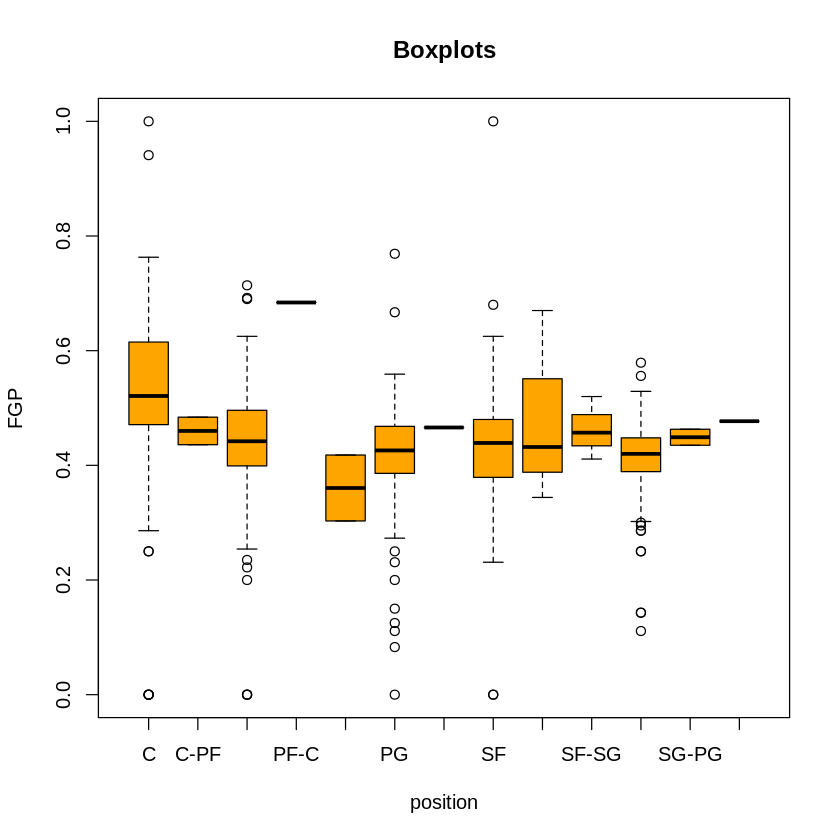

In [10]:
boxplot(data_mod$FG. ~ data_mod$Pos, col="orange", 
        main="Boxplots", 
        ylab="FGP", xlab="position")

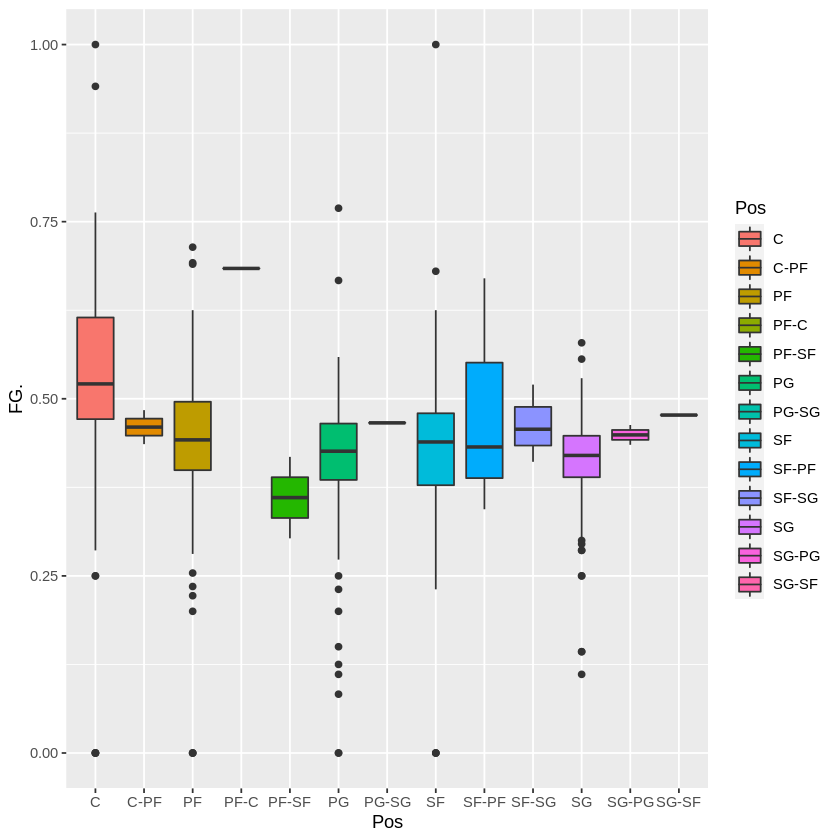

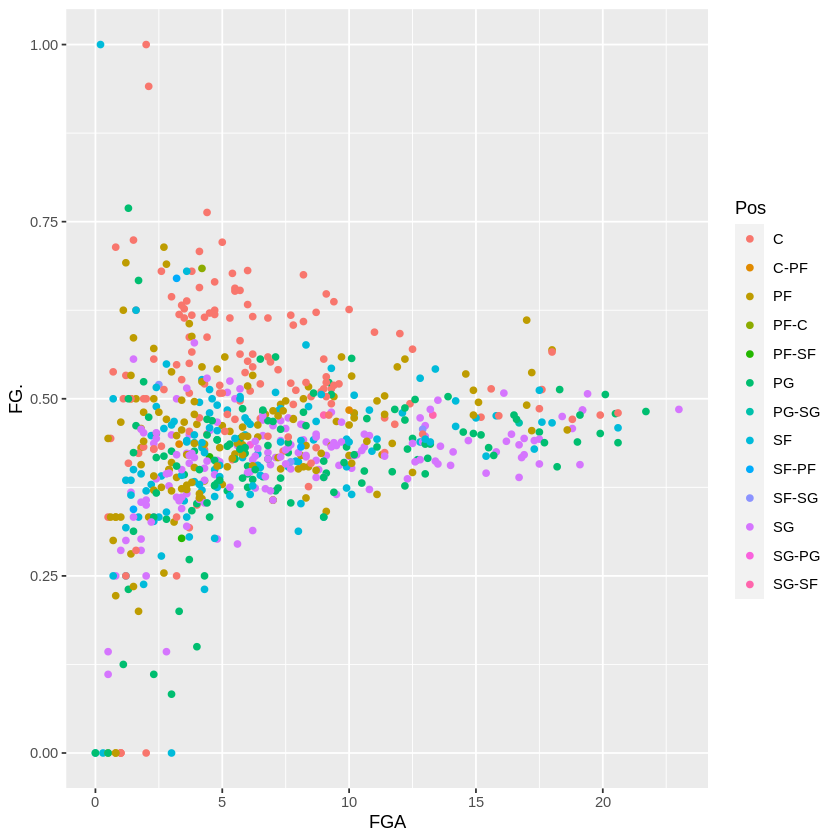

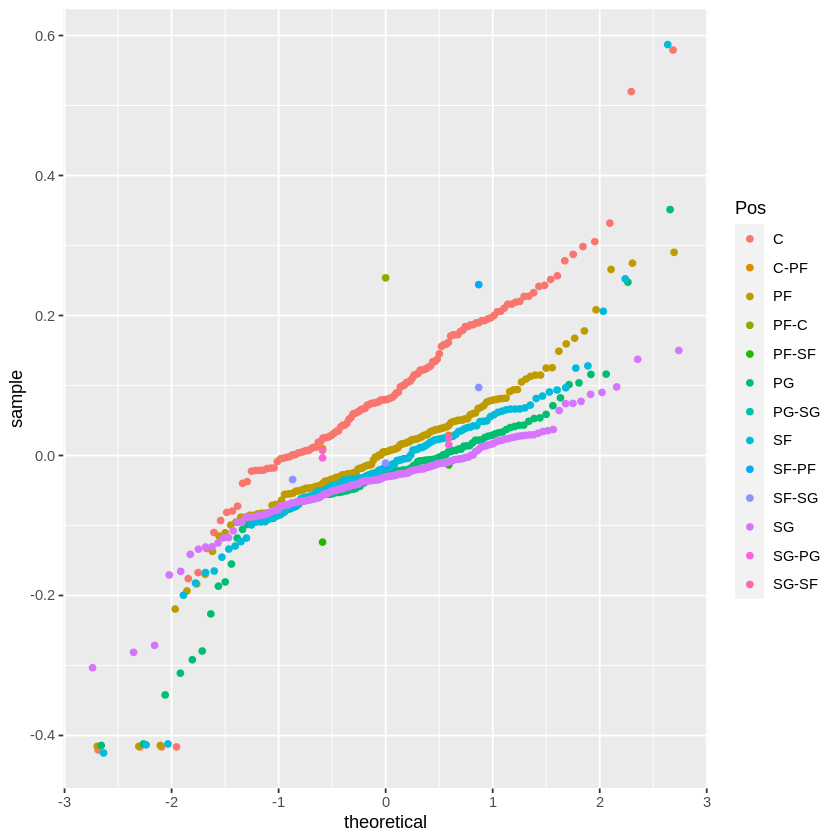

In [46]:
# Box plot
bp<-ggplot(data_mod, aes(x=Pos, y=FG., fill=Pos)) +
  geom_boxplot()
bp
# Scatter plot
sp<-ggplot(data_mod, aes(x=FGA, y=FG., color=Pos)) + geom_point()
sp

qq <- ggplot(data_mod, aes(sample=model$residuals, color=Pos))+stat_qq()
qq

# G

Fit a linear mixed-effects model (LMM) to data, via REML or maximum likelihood.

In [49]:
data_ext<-data_mod[,c(11,10,3)]
str(data_ext)
model_ext <- lmer(FG. ~ FGA + (FGA | Pos), data_ext)
summary(model_ext)

'data.frame':	704 obs. of  3 variables:
 $ FG.: num  0.125 0.614 0.57 0.473 0.464 0.521 0.25 0.419 0.418 0.618 ...
 $ FGA: num  1.1 5.3 12.5 11.4 11.8 9.6 0.8 10 8.3 7.7 ...
 $ Pos: chr  "PG" "C" "C" "C" ...


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: FG. ~ FGA + (FGA | Pos)
   Data: data_ext

REML criterion at convergence: -1149.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8847 -0.3824 -0.0186  0.4440  5.8662 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 Pos      (Intercept) 2.930e-03 0.054132      
          FGA         2.245e-06 0.001498 -1.00
 Residual             1.087e-02 0.104281      
Number of obs: 704, groups:  Pos, 13

Fixed effects:
            Estimate Std. Error t value
(Intercept) 0.415292   0.021421  19.387
FGA         0.004927   0.001015   4.853

Correlation of Fixed Effects:
    (Intr)
FGA -0.753
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


Results indicate that we have a correlation between these 2 variables after extending and using mixed effect models. (both corr = -1 and T_value far frmo zero)